## Observations and Insights 

In [1]:
# Didn't feel well prepared for this. should have started earlier and gotten help. its ugly and incomplete but times up so...

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
#data.info()

In [2]:
# Checking the number of mice in the DataFrame.
data['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID.
#!!!! Dropping all records for g989 as duplicate records contain conflicting data that is irreconcilable!!!!
data['key'] = data['Mouse ID'] + data['Timepoint'].astype(str)
data['dupe'] = data.duplicated(subset='key',keep=False)
data.loc[data['dupe'] == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,key,dupe
908,g989,Propriva,Female,21,26,0,45.000000,0,g9890,True
909,g989,Propriva,Female,21,26,0,45.000000,0,g9890,True
910,g989,Propriva,Female,21,26,5,48.786801,0,g9895,True
911,g989,Propriva,Female,21,26,5,47.570392,0,g9895,True
912,g989,Propriva,Female,21,26,10,51.745156,0,g98910,True
913,g989,Propriva,Female,21,26,10,49.880528,0,g98910,True
914,g989,Propriva,Female,21,26,15,51.325852,1,g98915,True
915,g989,Propriva,Female,21,26,15,53.442020,0,g98915,True
916,g989,Propriva,Female,21,26,20,55.326122,1,g98920,True
917,g989,Propriva,Female,21,26,20,54.657650,1,g98920,True


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drops = data[data['Mouse ID'] == 'g989'].index
data.drop(drops, inplace=True)
data.drop(['key', 'dupe'], axis=1, inplace=True)
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
data['Mouse ID'].nunique()

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
gb = data.groupby('Drug Regimen')
summary = pd.DataFrame({'Mean' : gb.mean()['Tumor Volume (mm3)'],
                        'Median' : gb.median()['Tumor Volume (mm3)'],
                        'Variance' : gb.var()['Tumor Volume (mm3)'],
                        'Std Dev' : gb.std()['Tumor Volume (mm3)'],
                        'SEM' : gb.sem()['Tumor Volume (mm3)']
                       })
summary

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

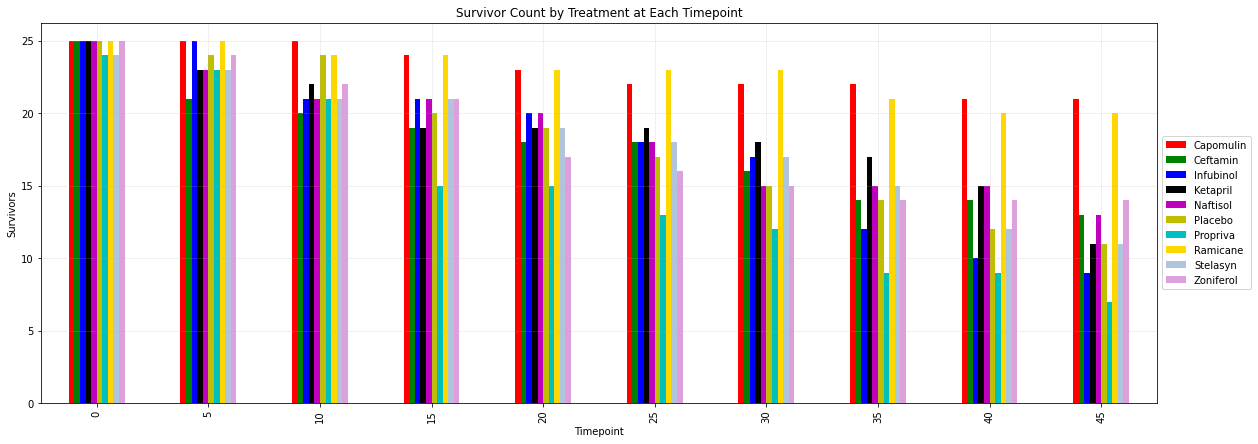

In [7]:
# Generate a bar plot showing the number of mice per time point for 
# each treatment throughout the course of the study using pandas.
mgb = data.groupby(['Timepoint', 'Drug Regimen'])
counts = mgb['Mouse ID'].count().unstack().plot(kind='bar',
                                                figsize=[20,7],
                                                color=['r', 'g', 'b', 'k', 'm', 'y','c','gold', 'lightsteelblue', 'plum'],
                                                title='Survivor Count by Treatment at Each Timepoint')

counts.set_ylabel('Survivors')
counts.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
counts.grid(linewidth='0.5', linestyle=":")


In [8]:
# Generate a bar plot showing the number of mice per time point for 
# each treatment throughout the course of the study using pyplot.

x = np.arange(len(data["Timepoint"].unique()))
width = 0.1

fig, ax = plt.subplots()

Ramicane_ct = ax.bar(, width, label='Ramicane')
Capomulin_ct = ax.bar(, width, label='Capomulin')
Infubinol_ct = ax.bar(, width, label='Infubinol')
Placebo_ct = ax.bar(, width, label='Placebo')
Ceftamin_ct = ax.bar(, width, label='Ceftamin')
Stelasyn_ct = ax.bar(, width, label='Stelasyn')
Naftisol_ct = ax.bar(, width, label='Naftisol')
Ketapril_ct = ax.bar(, width, label='Ketapril')
Propriva_ct = ax.bar(, width, label='Propriva')
Zoniferol_ct = ax.bar(, width, label='Zoniferol')

ax.set_ylabel('Survivors')
ax.set_title('Survivor Count by Treatment at Each Timepoint')
ax.set_xticks(x)
ax.set_xticklabels(data["Timepoint"].unique())
ax.legend()

SyntaxError: invalid syntax (<ipython-input-8-eeac59a4b169>, line 9)

## Pie Plots

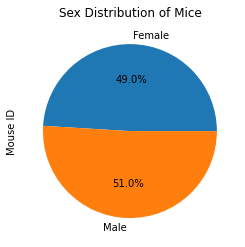

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie = data.groupby('Sex').count()['Mouse ID'].plot(kind='pie', autopct='%1.1f%%', title='Sex Distribution of Mice')



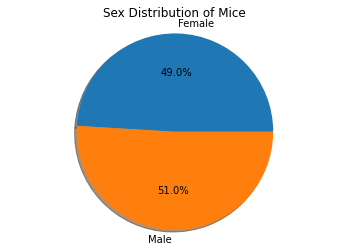

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title('Sex Distribution of Mice')
sex = data.groupby('Sex').count()['Mouse ID'].tolist()
sexs = ['Female', 'Male']
plt.pie(sex, labels=sexs, autopct="%1.1f%%", shadow=True)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

capomulin = data.loc[(data['Drug Regimen'] == 'Capomulin') & (data['Timepoint'] == 45)]
ramicane = data.loc[(data['Drug Regimen'] == 'Ramicane') & (data['Timepoint'] == 45)]
infubinol = data.loc[(data['Drug Regimen'] == 'Infubinol') & (data['Timepoint'] == 45)]
ceftamin = data.loc[(data['Drug Regimen'] == 'Ceftamin') & (data['Timepoint'] == 45)]
topfour = pd.concat([capomulin, ramicane, infubinol, ceftamin])

quartiles = topfour['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = topfour.loc[(topfour['Tumor Volume (mm3)'] < lower_bound) | (topfour['Tumor Volume (mm3)'] > upper_bound)]
outliers['Tumor Volume (mm3)'].count()

0

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
